# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Цель проекта

Выбор оптимального региона для бурения новой скважины с целью максимизации прибыли от добычи нефти.





## Задачи проекта:
1. Сбор и анализ данных:


2. Разработка модели машинного обучения:


3. Прогнозирование прибыли:


4. Выбор оптимального региона:


5. Оформление результатов:



## Содержание: 
* [Шаг 1. Загрузите и изучите данные](#1.)
* [  Импорты](#1.1)
* [  Смотрим  все наши датафреймы по очередности](#1.2)
* [  Обзор общей информации по датафреймам и кол-во пропусков ](#2.1)
* [ Смотрим описательную статистику. ](#2.2)
* [ Смотрим количество явных дубликатов](#2.3)
* [ Иследуем geo_data_0 ](#3.1)
* [ Иследуем geo_data_1 ](#3.2)
* [ Иследуем geo_data_2 ](#3.3)
* [  Смотрим корреляцию ](#3.4)
* [   Выводы по 1 шагу:](#3.5)

- [Шаг 2. Обучите и проверьте модель для каждого региона: ](#4.)


- [ Шаг 3. Подготовьтесь к расчёту прибыли:](#5.)
- [ Шаг 4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели::](#6.)
* [ Пишем функцию для прибыли ](#6.2)
* [ Выводы по заданию](#6.3)

## Загрузка и подготовка данных <a name="1.">

### Импорты <a name="1.1">

In [1]:
pip install phik


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score
from scipy import stats as st
from math import factorial
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
import phik

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.svm import SVC
#import kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor

In [3]:
try:
    geo_data_0=pd.read_csv('/Users/konstantingrigorev/Desktop/geo_data_0.csv')
except:
    geo_data_0=pd.read_csv('/datasets/geo_data_0.csv')
try:
    geo_data_1=pd.read_csv('/Users/konstantingrigorev/Desktop/geo_data_1.csv')
except:
    geo_data_1=pd.read_csv('/datasets/geo_data_1.csv')
try:
    geo_data_2=pd.read_csv('/Users/konstantingrigorev/Desktop/geo_data_2.csv')
except:
    geo_data_2=pd.read_csv('/datasets/geo_data_2.csv')


### Смотрим  все наши датафреймы по очередности  <a name="1.2">

In [4]:
geo_data_0.sample()

,id,f0,f1,f2,product
85824,dZNcS,-0.944791,0.471651,5.303783,32.023019


In [5]:
geo_data_1.sample()

,id,f0,f1,f2,product
27785,1Dc5k,-12.582582,-13.489522,4.997152,137.945408


In [6]:
geo_data_2.sample()

,id,f0,f1,f2,product
70107,E2cvT,-2.0688,0.195974,0.303863,64.163995


Данные загружены, при первом просмотре всё хорошо

### Обзор общей информации по датафреймам и кол-во пропусков  <a name="2.1">

In [7]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


После просмотра общей информации об датасете, видим, что пропусков нету, типы данных определнны верно.

### Смотрим описательную статистику  <a name="2.2">

In [10]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [11]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [12]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Просмотрели описательную статистику, с ней всё хорошо, нету выбивающийся значений, идем дальше

### Смотрим количество явных дубликатов   <a name="2.3">

In [13]:
print(geo_data_0.duplicated().sum()) 
print(geo_data_1.duplicated().sum()) 
print(geo_data_2.duplicated().sum()) 


0
0
0


In [14]:

train_without_id=geo_data_2.drop('id', axis=1)
train_without_id.duplicated().sum()

0

Дубликатов нет, проверил еще на наличие дуликатов без айзди, их нету, идем дальше

### Иследуем geo_data_0  <a name="3.1">

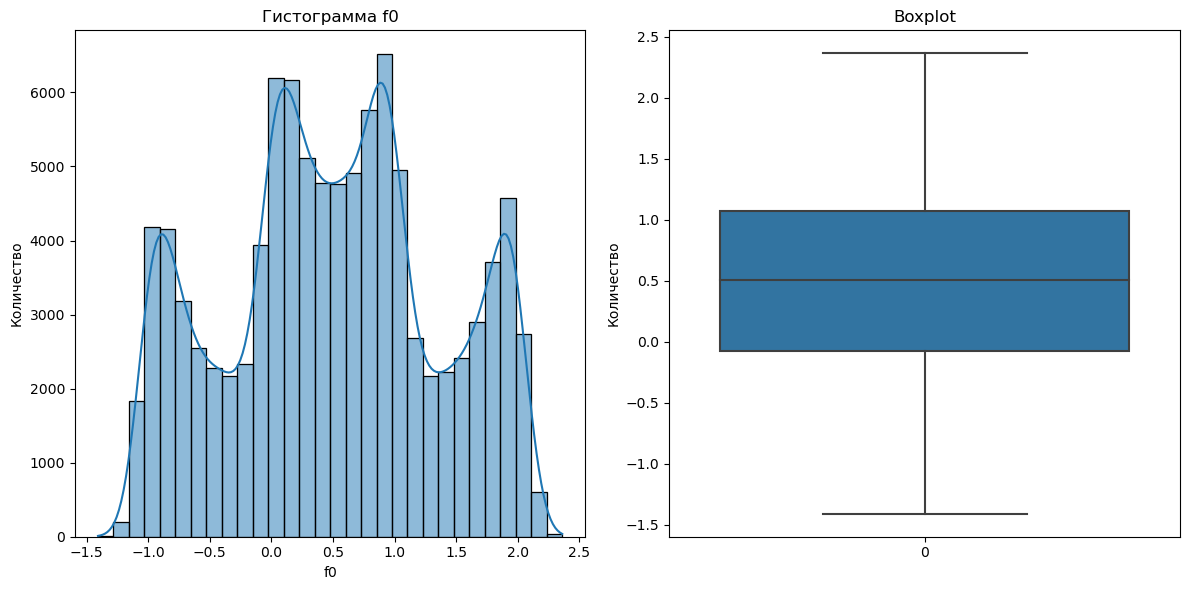

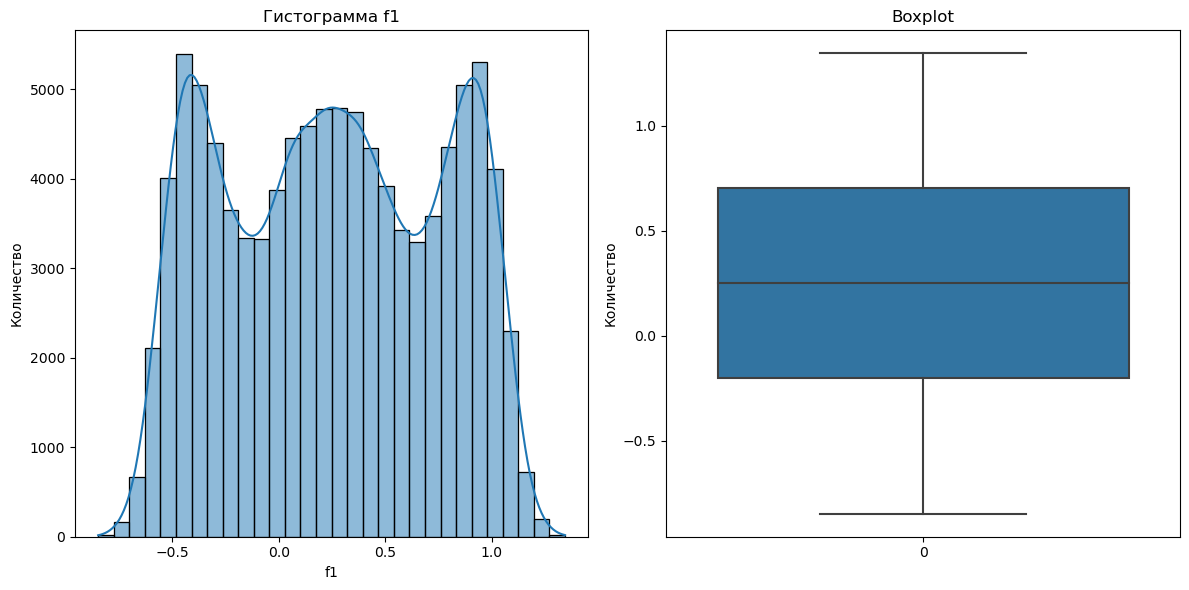

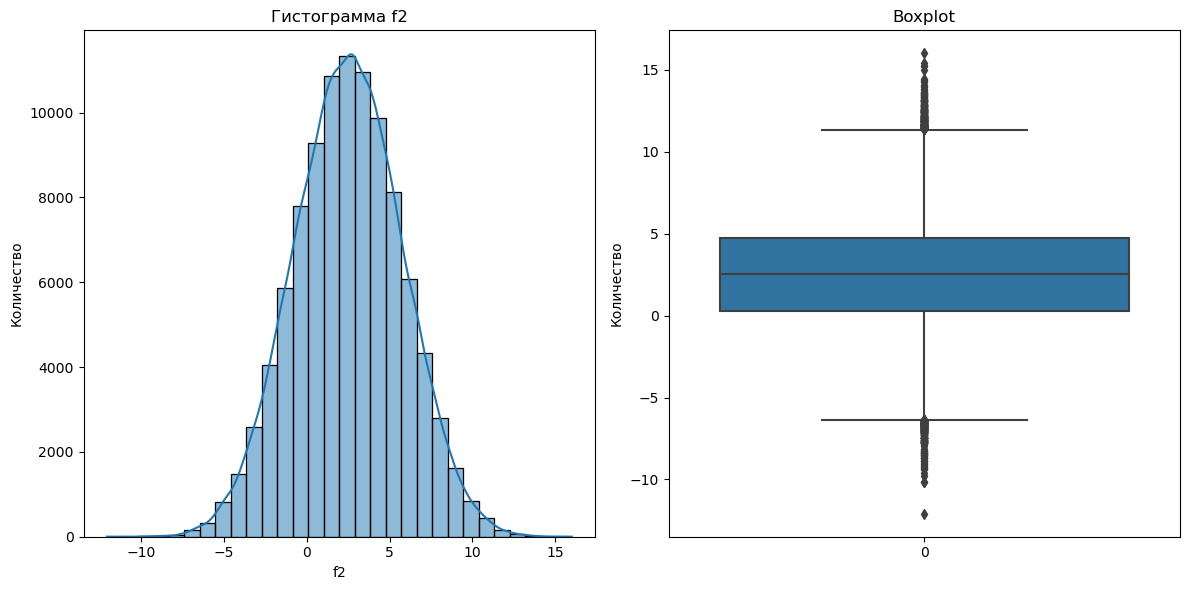

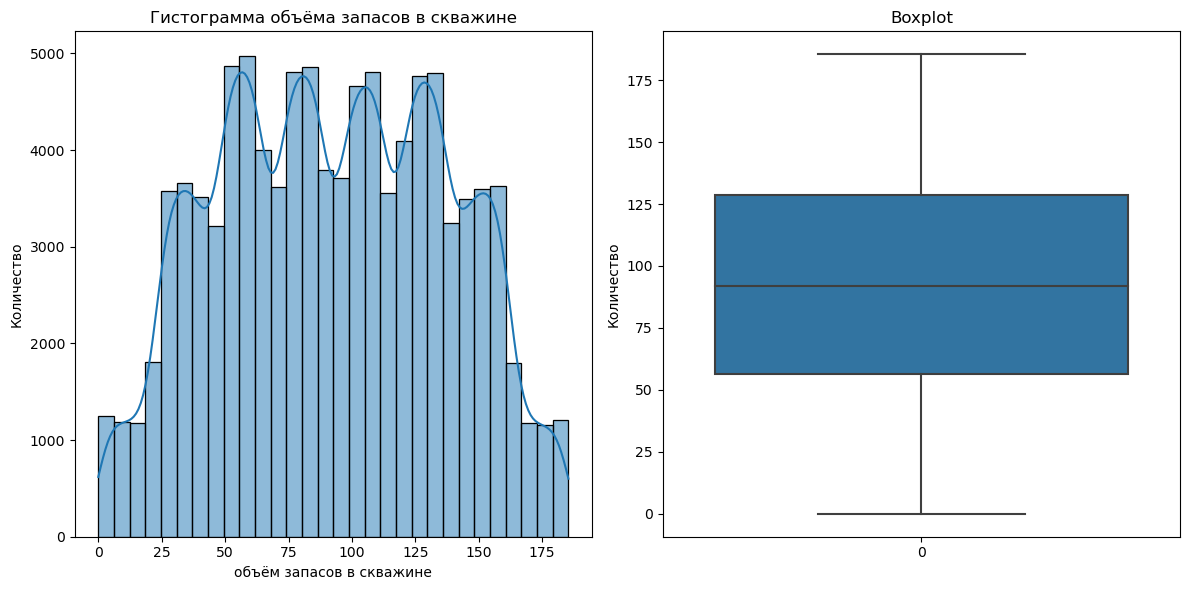

In [15]:
def plot_histogram_and_boxplot(data, column, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(1, 2, 2)
    sns.boxplot(data[column], orient='v')
    plt.title('Boxplot')
    plt.ylabel(ylabel)
    
    plt.tight_layout()
    plt.show()

columns_to_plot = ['f0', 'f1', 'f2', 'product']
title_to_plot = ['Гистограмма f0', 'Гистограмма f1', 'Гистограмма f2', 'Гистограмма объёма запасов в скважине']
xlabel_to_plot = ['f0', 'f1', 'f2', 'объём запасов в скважине']
ylabel_to_plot = ['Количество', 'Количество', 'Количество', 'Количество']

for column, title, xlabel, ylabel in zip(columns_to_plot, title_to_plot, xlabel_to_plot, ylabel_to_plot):
    plot_histogram_and_boxplot(geo_data_0, column, title=title, xlabel=xlabel, ylabel=ylabel)

Расмотрим наш нулевой регион:
- (F0) Получился честно-говоря какой-то бэтмен, про нормальное распределение  тут даже рядом нельзя говорить, предполгаю, что. с этим ничего нельзя сделать.
- F(1) В принципе видим тоже самое что и на первом графике,нормального распределения нет
- F(2) Тут мы видим уже что-то подобное на полунормальное распределние, однако распределние скошено в право, видим большое кол-во выбросов,но делать с ними ничего пока не будем. Нужно будет масштабировать данные
- (Product) нормального распреределения нет, возник вопрос, надо ли эти данные как-нибудь кодировать?

### Иследуем geo_data_1  <a name="3.2">

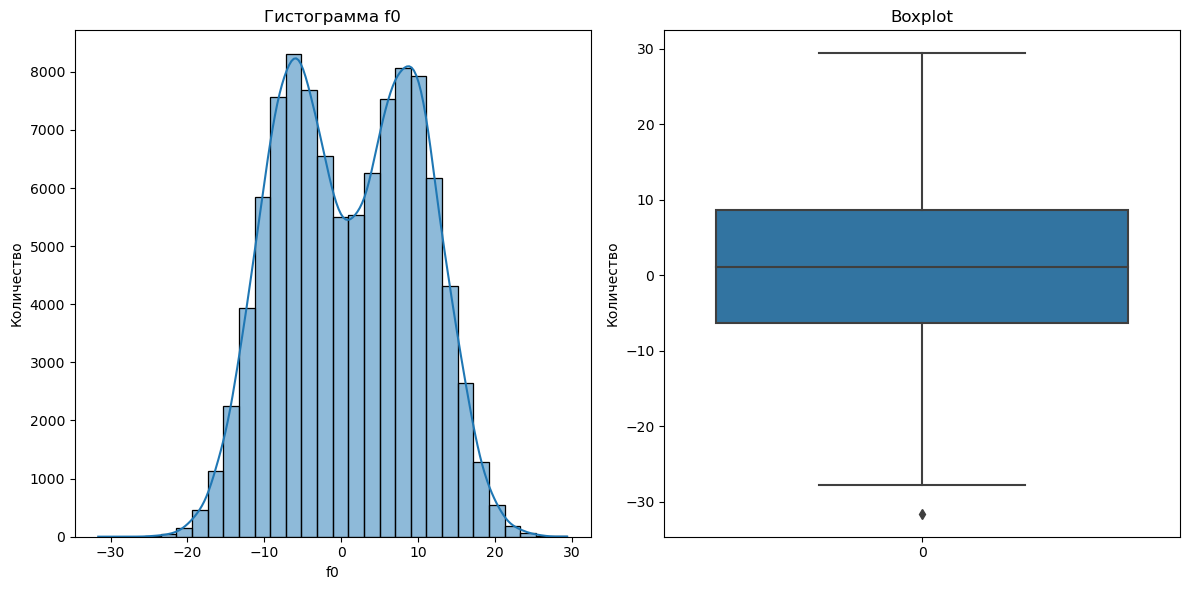

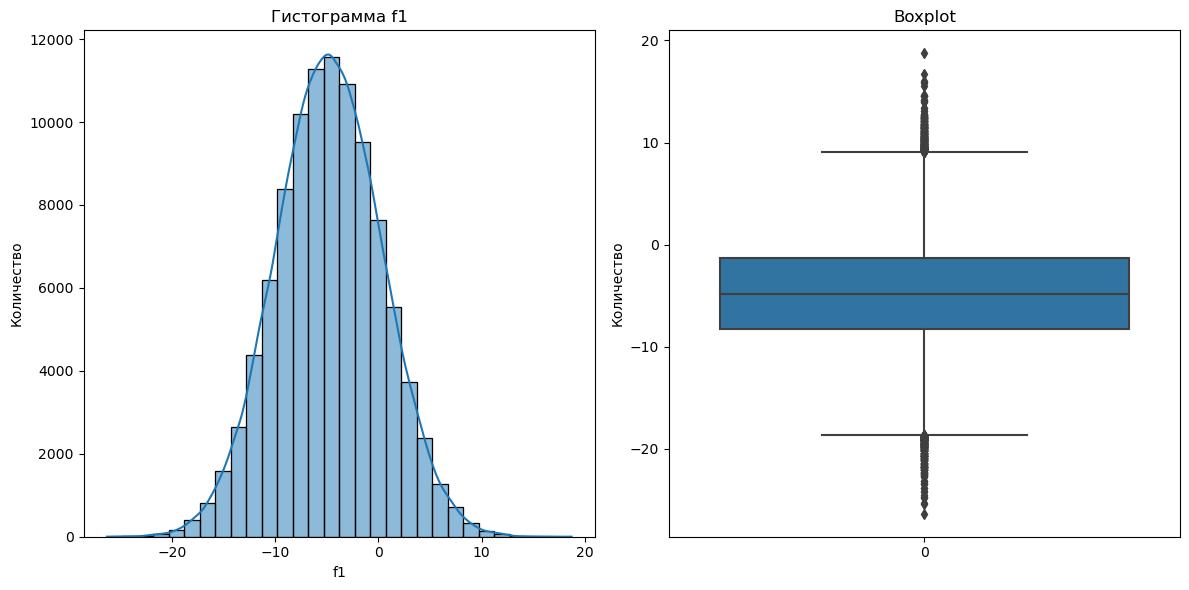

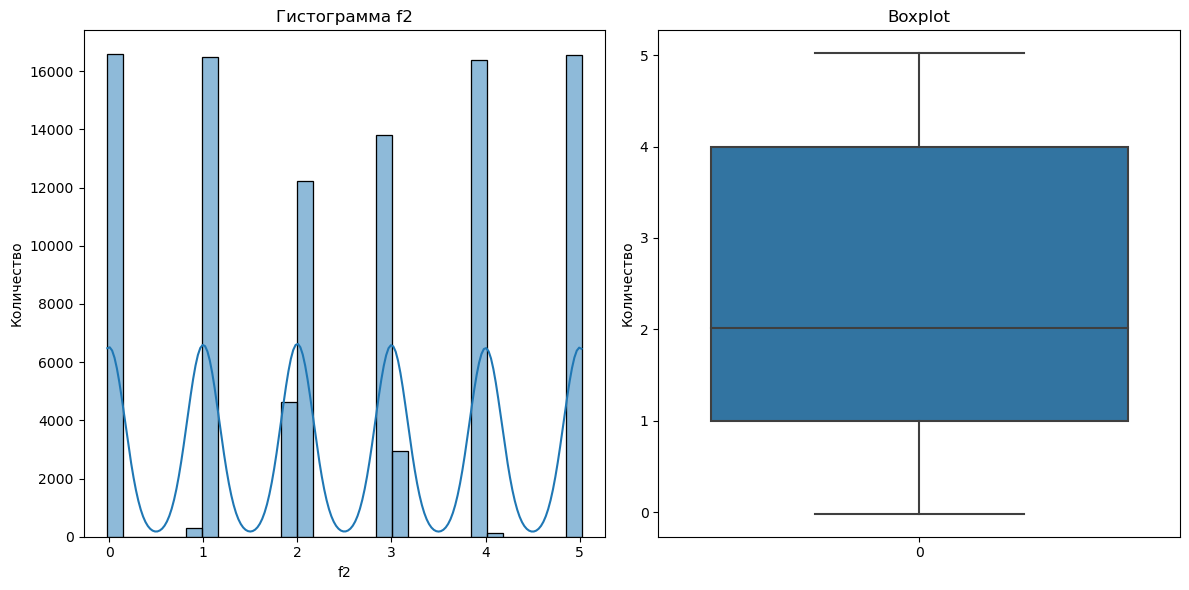

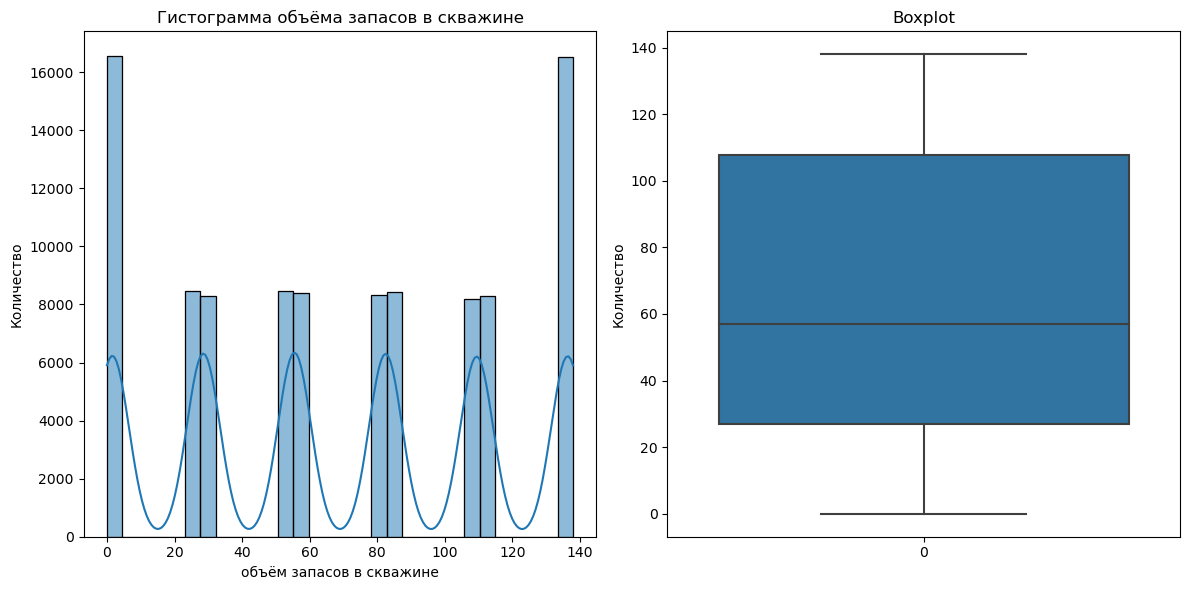

In [16]:
for column, title, xlabel, ylabel in zip(columns_to_plot, title_to_plot, xlabel_to_plot, ylabel_to_plot):
    plot_histogram_and_boxplot(geo_data_1, column, title=title, xlabel=xlabel, ylabel=ylabel)

Расмотрим наш первый регион:
- (F0) Получился опять бэтмен, про нормальное распределение  тут даже рядом нельзя говорить, предполгаю, что. с этим ничего нельзя сделать.
- F(1) Тут мы видим уже что-то подобное на полунормальное распределние, однако распределние скошено в право, видим большое кол-во выбросов,но делать с ними ничего пока не будем.
- F(2) Здесь мы видим практически категориальный столбец, вопрос, надо ли это переводить в категории?
- (Product) Опять тот же вопрос надо ли это переводить в категории, в обучении я не категоризировал эти данные

### Иследуем geo_data_2  <a name="3.3">

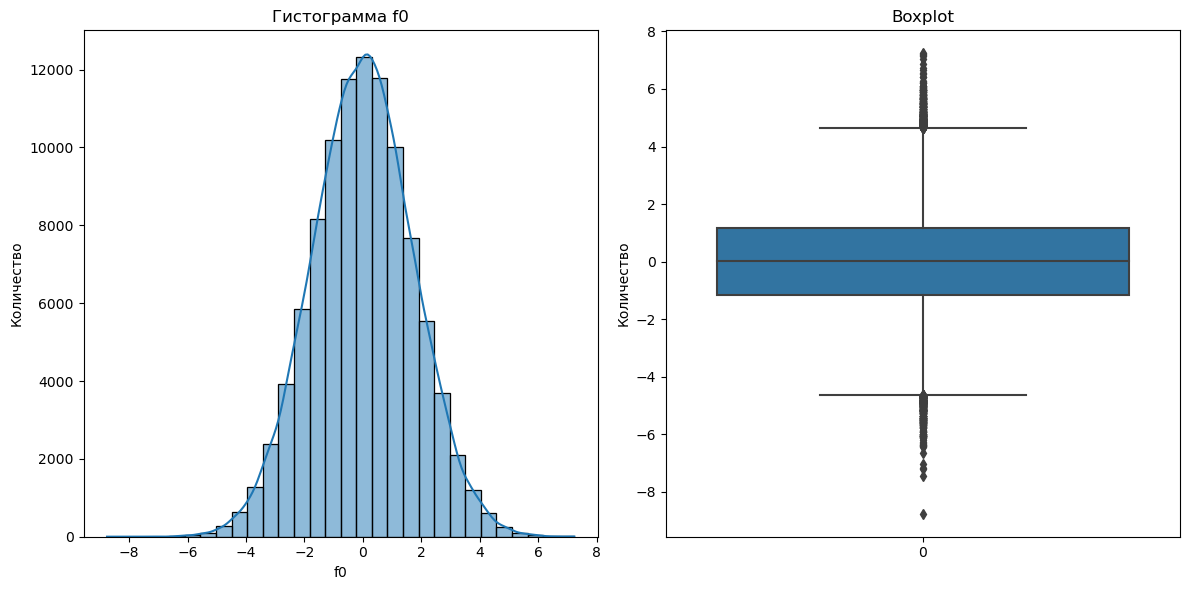

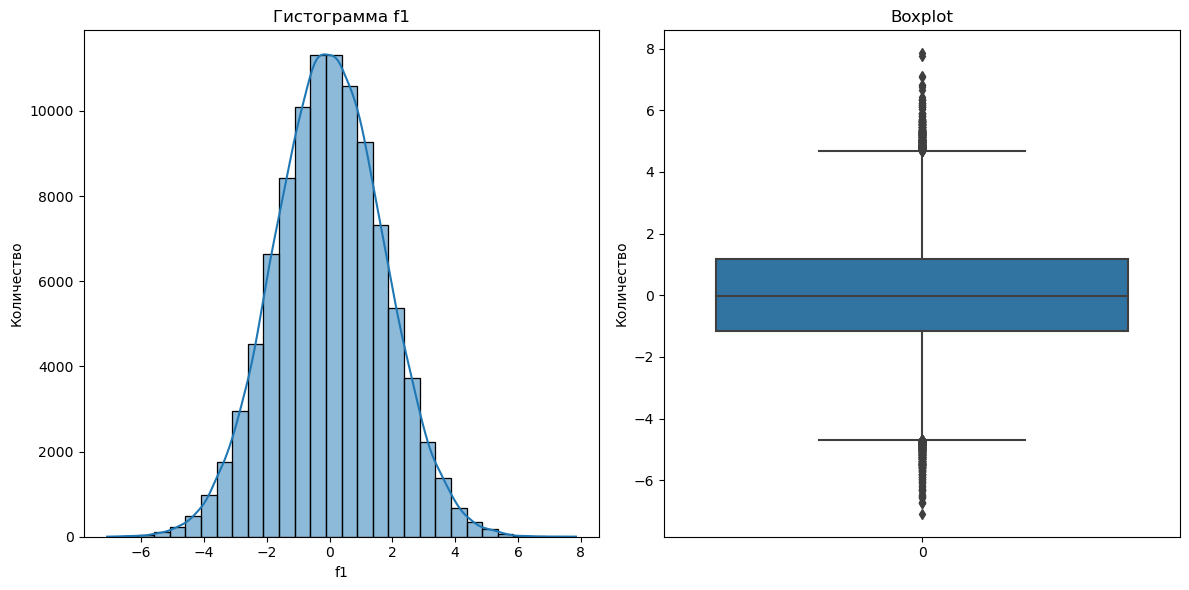

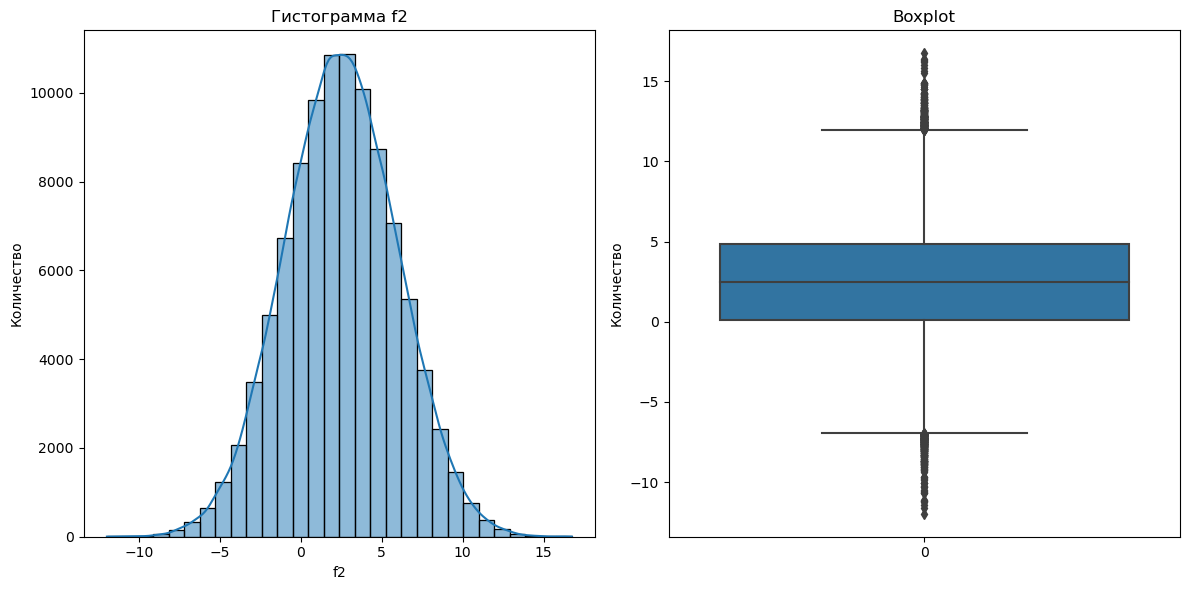

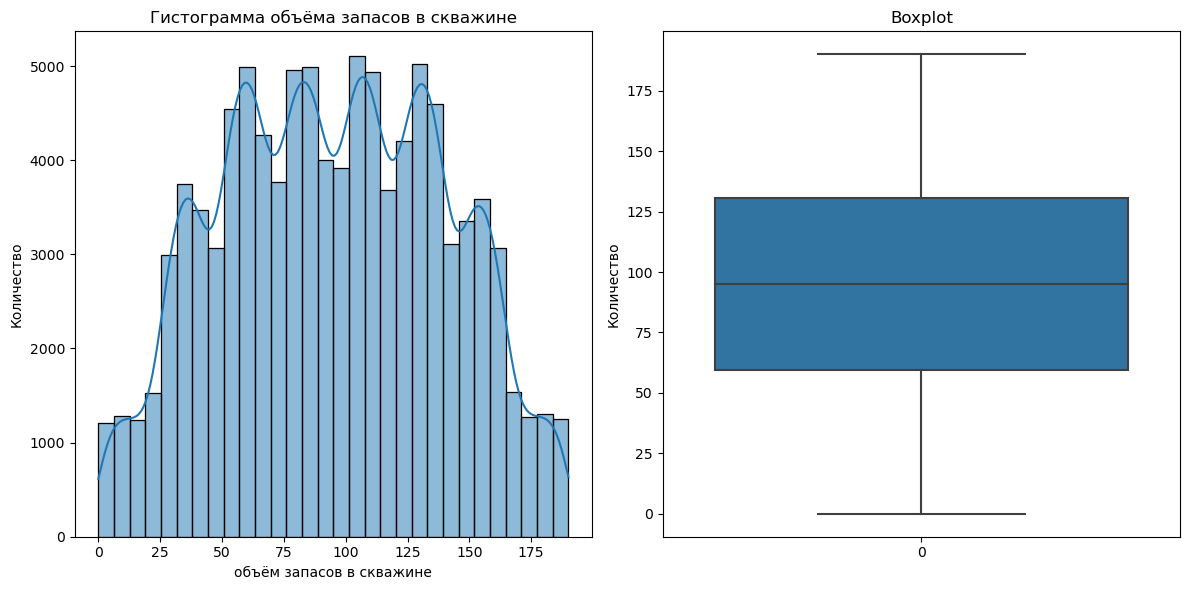

In [17]:


for column, title, xlabel, ylabel in zip(columns_to_plot, title_to_plot, xlabel_to_plot, ylabel_to_plot):
    plot_histogram_and_boxplot(geo_data_2, column, title=title, xlabel=xlabel, ylabel=ylabel)
    

Расмотрим наш второй регион:
- (F0) Тут мы видим нормальное распределние, видим большое кол-во выбросов,но делать с ними ничего пока не будем.
- F(1) Тут мы видим нормальное распределние, видим большое кол-во выбросов,но делать с ними ничего пока не будем.
- F(2) З Тут мы видим уже что-то подобное на полунормальное распределние, однако распределние скошено в право, видим большое кол-во выбросов,но делать с ними ничего пока не будем.
- (Product) Тут можно увидеть задатки категориального распределения, тут. оставляем всё как есть

### Смотрим корреляцию  <a name="3.4">

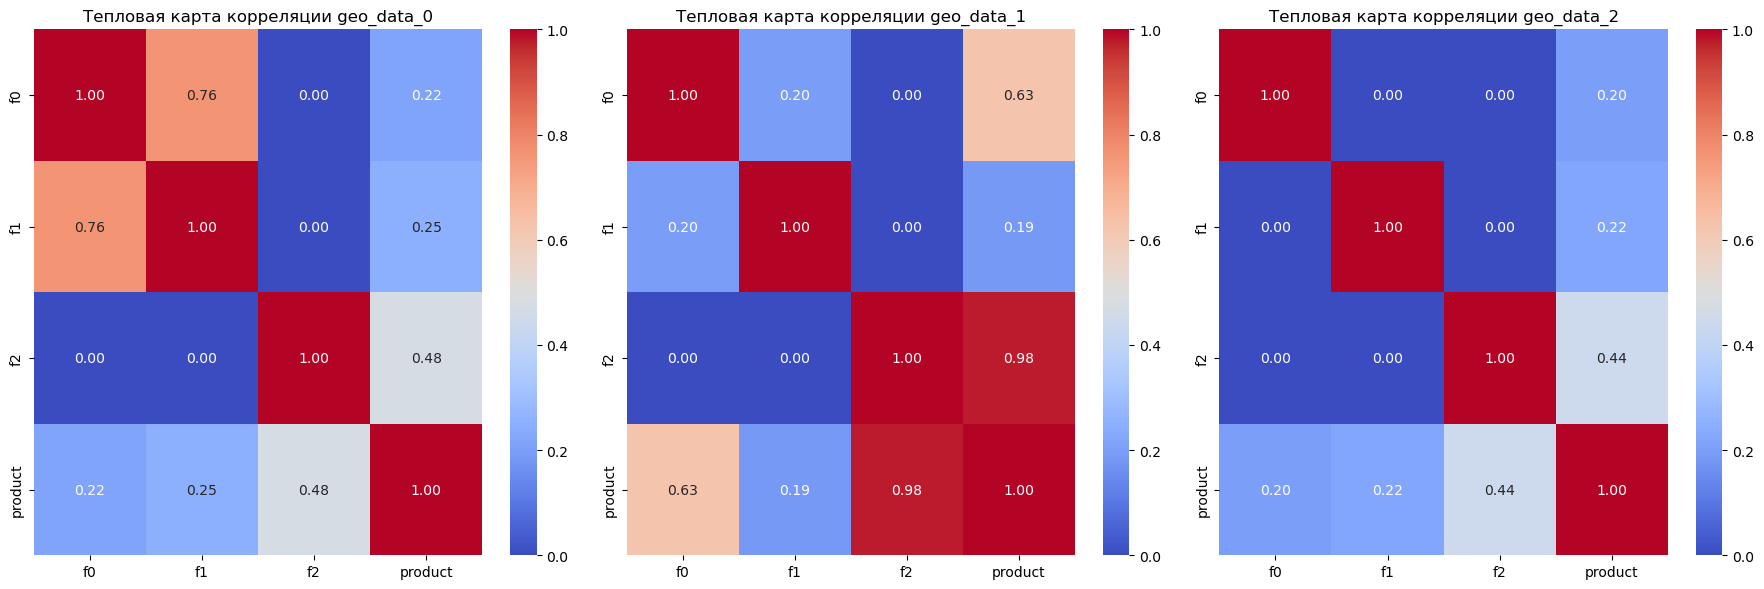

In [18]:
def plot_phik_heatmap(geo_data, dataset_name, ax):
    correlation_matrix = geo_data.drop('id', axis=1).phik_matrix(interval_cols=['f0', 'f1', 'f2', 'product'])
    
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
    ax.set_title(f"Тепловая карта корреляции {dataset_name}")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_phik_heatmap(geo_data_0, "geo_data_0", axs[0])
plot_phik_heatmap(geo_data_1, "geo_data_1", axs[1])
plot_phik_heatmap(geo_data_2, "geo_data_2", axs[2])

plt.tight_layout()
plt.show()

Видим аномалиии в нулевом и первом регионе:
В первом видим сильную корреляцию между f1 & f0, а во втором видим сильнейшую корреляцию между f2 & product, я ничегос этим не могу сделать, так как в условии указано, что все признаки важны и мы не можем их выбросить

In [19]:
RANDOM_STATE=42
TEST_SIZE=0.25
# Данные для geo_data_0
X_0 = geo_data_0.drop(columns=['id', 'product'])
y_0 = geo_data_0['product']
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Данные для geo_data_1
X_1 = geo_data_1.drop(columns=['id', 'product'])
y_1 = geo_data_1['product']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Данные для geo_data_2
X_2 = geo_data_2.drop(columns=['id', 'product'])
y_2 = geo_data_2['product']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=TEST_SIZE, random_state=RANDOM_STATE)

Разделили наши выборки на тренировочные и валидационные,если они названы тестом ничего страшного?

### Выводы по первому шагу: <a name="3.5">
- Данные загружены, при первом просмотре всё хорошо
- После просмотра общей информации об датасете, видим, что пропусков нету, типы данных определнны верно.
- Просмотрели описательную статистику, с ней всё хорошо, нету выбивающийся значений
- Дубликатов нет, проверил еще на наличие дуликатов без айзди, их нету
- Расмотрим наш нулевой регион:
- (F0) Получился честно-говоря какой-то бэтмен, про нормальное распределение  тут даже рядом нельзя говорить, предполгаю, что. с этим ничего нельзя сделать.
- F(1) В принципе видим тоже самое что и на первом графике,нормального распределения нет
- F(2) Тут мы видим уже что-то подобное на полунормальное распределние, однако распределние скошено в право, видим большое кол-во выбросов,но делать с ними ничего пока не будем. Нужно будет масштабировать данные
- Расмотрим наш первый регион:
- (F0) Получился опять бэтмен, про нормальное распределение тут даже рядом нельзя говорить, предполгаю, что. с этим ничего нельзя сделать.
- F(1) Тут мы видим уже что-то подобное на полунормальное распределние, однако распределние скошено в право, видим большое кол-во выбросов,но делать с ними ничего пока не будем.
- F(2) Здесь мы видим практически категориальный столбец
- (Product) Опять тот же вопрос надо ли это переводить в категории, в обучении я не категоризировал эти данные
- Расмотрим наш второй регион:

- (F0) Тут мы видим нормальное распределние, видим большое кол-во выбросов,но делать с ними ничего пока не будем.
- F(1) Тут мы видим нормальное распределние, видим большое кол-во выбросов,но делать с ними ничего пока не будем.
- F(2) З Тут мы видим уже что-то подобное на полунормальное распределние, однако распределние скошено в право, видим большое кол-во выбросов,но делать с ними ничего пока не будем.
- (Product) Тут можно увидеть задатки категориального распределения, тут. оставляем всё как есть

Корелляция 
- Видим аномалиии в нулевом и первом регионе: В первом видим сильную корреляцию между f1 & f0, а во втором видим сильнейшую корреляцию между f2 & product, я ничегос этим не могу сделать, так как в условии указано, что все признаки важны и мы не можем их выбросить 

## Обучение и проверка модели  <a name="4.">

Для месторождения 0:
MAE = 31
R2 = 0.2728287328173472
MSE = 1425.5608700093808
RMSE = 37.756600350261685
Среднее значение предсказанных значений: 92.39879990657768


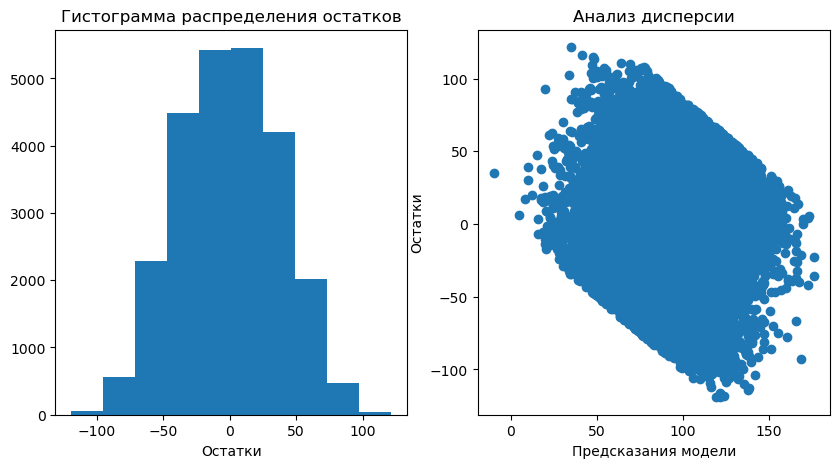

Для месторождения 1:
MAE = 1
R2 = 0.9996245232002449
MSE = 0.7925986566391967
RMSE = 0.8902801001028815
Среднее значение предсказанных значений: 68.7128780391376


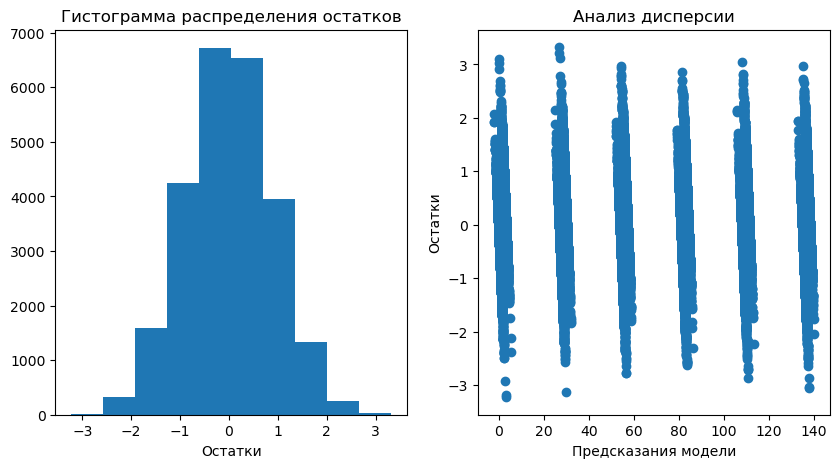

Для месторождения 2:
MAE = 33
R2 = 0.19634705977280487
MSE = 1611.6910636385903
RMSE = 40.145872311342174
Среднее значение предсказанных значений: 94.77102387765936


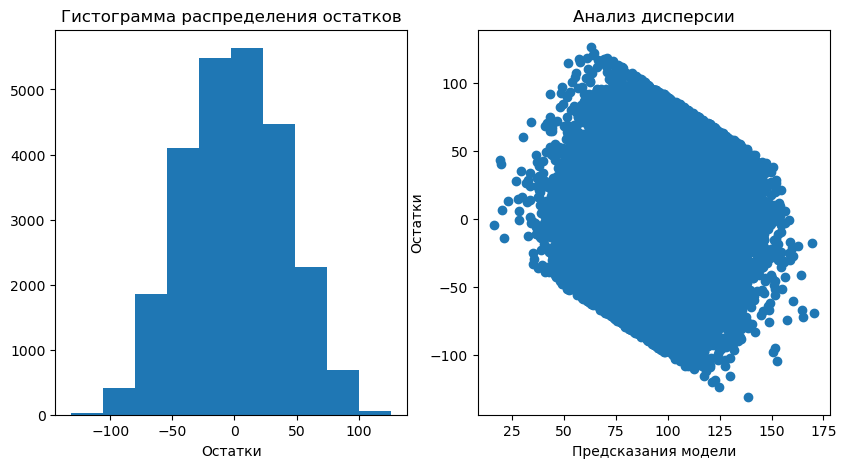

In [20]:
datasets = [(X_train_0, X_test_0, y_train_0, y_test_0),
            (X_train_1, X_test_1, y_train_1, y_test_1),
            (X_train_2, X_test_2, y_train_2, y_test_2)]
predictions_dataset_0 = []
predictions_dataset_1 = []
predictions_dataset_2 = []

for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    # Масштабирование числовых признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Преобразование массивов в DataFrame
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=['f0', 'f1', 'f2'])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=['f0', 'f1', 'f2'])

    # Инициализация и обучение модели
    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train)

    # Получение предсказаний
    predictions = model_lr.predict(X_test_scaled)
    
    if i == 0:
        predictions_dataset_0 = predictions
    elif i == 1:
        predictions_dataset_1 = predictions
    elif i == 2:
        predictions_dataset_2 = predictions
    # Вычисление метрик
    mean_prediction = predictions.mean()

    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    # Вывод результатов
    print(f"Для месторождения {i}:")
    print(f'MAE = {mae:.0f}')
    print("R2 =", r2)
    print("MSE =", mse)
    print("RMSE =", rmse)
    print("Среднее значение предсказанных значений:", mean_prediction)


    # Анализ остатков
    residuals = y_test - predictions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

- Месторождение 0:

MAE  равно 31, что означает, что средняя абсолютная ошибка предсказаний составляет 31.
R2 (коэффициент детерминации) равен 0.27, что указывает на то, что модель не очень хорошо объясняет вариацию в данных.
Среднее значение предсказанных значений составляет 92.40.
- Месторождение 1:

MAE равно 1, что говорит о том, что средняя абсолютная ошибка предсказаний очень низкая.
R2 равен 0.9996, что указывает на очень высокую степень соответствия между предсказанными и фактическими значениями.
RMSE равно 0.89, что также очень низко.

- Месторождение 2:

MAE равно 33.
R2 равен 0.20, что говорит о том, что модель объясняет лишь небольшую часть вариации в данных.
Среднее значение предсказанных значений составляет 94.77.
- Исходя из этих результатов, можно сделать следующие выводы:

Месторождение 0 и месторождение 2 имеют сравнительно высокие значения ошибок (MAE, MSE, RMSE) и низкие значения коэффициента детерминации (R2), что указывает на недостаточную точность модели и слабую способность объяснить вариацию в данных.
Месторождение 1 имеет очень низкие значения ошибок и высокий коэффициент детерминации, что указывает на высокую точность модели и хорошую способность объяснить вариацию в данных.

## Подготовка к расчёту прибыли <a name="5.">

In [21]:
budget = 10000000000  # бюджет на разработку одной скважины, в рублях
barrel_profit = 450000  # прибыль с одного барреля сырья, в рублях 
sample_size = 500  # количество точек при разведке
selected_wells = 200  # количество лучших точек для разработки
risk_threshold = 0.025  # пороговая вероятность убытков
region_count = 3  # количество регионов для исследования

# Расчет достаточного объема сырья для безубыточной разработки
break_even_volume = budget / barrel_profit/selected_wells

print("объем сырья для безубыточной разработки одной скважины:", break_even_volume)



объем сырья для безубыточной разработки одной скважины: 111.11111111111111


In [22]:
print('Средний объем запасов скважины в 0-м регионе: ', geo_data_0['product'].mean())
print('Средний объем запасов скважины в 1-м регионе: ', geo_data_1['product'].mean())
print('Средний объем запасов скважины в 2-м регионе: ', geo_data_2['product'].mean())

Средний объем запасов скважины в 0-м регионе:  92.50000000000001
Средний объем запасов скважины в 1-м регионе:  68.82500000000002
Средний объем запасов скважины в 2-м регионе:  95.00000000000004


Для того чтобы регион был безубыточный, необходимо, чтобы в регионе запасы потенциального сырья для выкачки были не менее 111 тыс. баррелей. Что на ~16 единиц превышает средний запас региона с самым большим количеством запасов.

## Расчёт прибыли и рисков  <a name="6.">

In [23]:
def series_type(target, pred):
    target = target.reset_index(drop=True)
    pred = pd.Series(pred)
    return target, pred
y_test_0, predictions_dataset_0 = series_type(y_test_0, predictions_dataset_0)
y_test_1, predictions_dataset_1 = series_type(y_test_1, predictions_dataset_1)
y_test_2, predictions_dataset_2 = series_type(y_test_2, predictions_dataset_2)

Были сначла ошибки из-за типов данных, решил все привести к одному типу данных, чтобы дальше не вохникало проблем

In [24]:
def total_income(target, probabilities, count, barrel_profit, budget):
    prob_sort = probabilities.sort_values(ascending=False)
    selected = target[prob_sort.index][:count]
    return int(barrel_profit * selected.sum() - budget)

### Функция для подсчета прибыли <a name="6.2">

In [25]:
def bootstrap_regions(target, predicted, selected_wells, barrel_profit, budget):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n = sample_size, replace=True, random_state=state)
        pred_subsumple = predicted[target_subsample.index]

        values.append(total_income(target_subsample, pred_subsumple,
                                   selected_wells, barrel_profit, budget))
    values = pd.Series(values)
    values_mean = int(values.mean())
    lower = int(values.quantile(q=0.025))
    upper = int(values.quantile(q=0.975))
    risk = int(len(values[values < 0]) / len(values) * 100)
    return values_mean, lower, upper, risk
values_mean_0, lower_0, upper_0, risk_0  = bootstrap_regions(y_test_0, predictions_dataset_0, selected_wells, barrel_profit, budget)
values_mean_1, lower_1, upper_1, risk_1  = bootstrap_regions(y_test_1, predictions_dataset_1, selected_wells, barrel_profit, budget)
values_mean_2, lower_2, upper_2, risk_2  = bootstrap_regions(y_test_2, predictions_dataset_2, selected_wells, barrel_profit, budget)


Применяем бустрап для нашей задачи, хотел бы попросить у вас каких-нибудь статьей о бустрапе, если вас не затруднит.

In [26]:
data = {
    'Регион': ['Регион 0', 'Регион 1', 'Регион 2'],
    '95% Нижний доверительный интервал': [lower_0, lower_1, lower_2],
    '95% Верхний доверительный интервал': [upper_0, upper_1, upper_2],
    'Средняя прибыль': [values_mean_0, values_mean_1, values_mean_2],
    'Вероятность риска': [risk_0, risk_1, risk_2]
}


df = pd.DataFrame(data)
df.T

,0,1,2
Регион,Регион 0,Регион 1,Регион 2
95% Нижний доверительный интервал,-116231612,55116176,-153116984
95% Верхний доверительный интервал,966504179,905762649,952887416
Средняя прибыль,435933771,489661253,403687927
Вероятность риска,6,1,7


### Выводы по заданию  <a name="6.3">

Хотя изначально я не думал, что первый регион будет очень перспективным (запасы сырья там невысокие, и их добыча может быть невыгодной), наш прогноз показал совсем обратное. Получилос что именно первый регион оказался наиболее привлекательным для обустройства. Поначалу показатели там не очень впечатляют. Но наша модель показывает, что в этом регионе можно получить хорошую прибыль при минимальном риске убытков. Если я правильно понял условие задачи то нам не подходит ни один регион, но если выбирать из трех то выберем первый регион.


Причины почему мы должны выбрать первый решион:

- Запасы сырья не самые большие,но все же есть
- Риск убытков минмальный
- Есть потенциал для получения оптимальной прибыли.
Что было сделано:

- Собраны и проанализированы данные:

- Обучены модели: Обучены на основе линейной регрессии. НАйдены: Средние запасы и предсказанные объемы нефти. RMSE (ошибка модели).
- Расчет прибыли: Минимальный объем сырья для безубыточной разработки: 111 тыс. баррелей.
- Составлена функция для расчета прибыли. Оценка результатов: Рассчитана средняя прибыль, доверительный интервал и риски.
- Сравнены показатели для каждого региона.


Результат:
- Достаточный объем сырья для безубыточной разработки одной скважины: 111.11111111111111
- Средний объем запасов скважины в 0-м регионе:  92.50000000000001
- Средний объем запасов скважины в 1-м регионе:  68.82500000000002
- Средний объем запасов скважины в 2-м регионе:  95.00000000000004
- Первый регион является оптимальным для добычи нефти.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [X]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [X]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован